Universidade Estadual de Campinas – UNICAMP 

Disciplina: Ciência e Visualização de Dados em Saúde

                    Análise de dados da hanseníase: uma abordagem preditiva para a saúde pública

# Imports e configs de módulos

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import imageio
from IPython.display import Image

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 70)
%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.005)

# Datasets

In [20]:
df_hans = pd.read_csv('../data/interim/hans_pre_covid.csv')

C:\Users\mclar\AppData\Local\Temp\ipykernel_10864\374532647.py:1: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hans = pd.read_csv('../data/interim/hans_pre_covid.csv')


In [21]:
df_hans.head()

,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_DIAG,ANO_NASC,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_OCUPA_N,FORMACLINI,AVALIA_N,CLASSOPERA,MODODETECT,BACILOSCOP,DTINICTRAT,ESQ_INI_N,UFATUAL,ID_MUNI_AT,DT_NOTI_AT,ID_UNID_AT,UFRESAT,MUNIRESAT,CLASSATUAL,AVAL_ATU_N,ESQ_ATU_N,EPIS_RACIO,NU_ANO,NU_LESOES,CONTREG,DOSE_RECEB,CONTEXAM,DTALTA_N,TPALTA_N
0,29.0,292700,1382.0,2653257.0,27/11/2008,1958.0,M,6.0,4.0,3.0,29.0,292700.0,1382.0,NaN,2.0,3.0,1.0,2.0,3.0,02/03/2009,1.0,BA,292700.0,01/01/2009,2653257.0,29.0,292700.0,1.0,3.0,1.0,4.0,2009,1.0,4.0,6.0,NaN,29/12/2009,1.0
1,21.0,210330,1434.0,2449706.0,01/01/2009,1943.0,M,6.0,4.0,1.0,21.0,210330.0,1434.0,NaN,4.0,1.0,2.0,1.0,1.0,23/10/2009,2.0,MA,210330.0,01/01/2009,2449706.0,21.0,210330.0,2.0,1.0,2.0,4.0,2009,10.0,6.0,12.0,1.0,22/09/2010,1.0
2,26.0,260290,1497.0,20389.0,13/10/2008,1994.0,F,9.0,NaN,NaN,26.0,260290.0,1497.0,999991.0,1.0,0.0,1.0,1.0,2.0,13/10/2008,1.0,PE,260290.0,02/01/2009,20389.0,26.0,260290.0,1.0,NaN,1.0,NaN,2009,1.0,3.0,NaN,3.0,22/05/2009,1.0
3,21.0,211290,1432.0,2455706.0,02/01/2009,1957.0,M,6.0,1.0,2.0,21.0,211290.0,1432.0,NaN,4.0,3.0,2.0,2.0,1.0,02/01/2009,2.0,MA,211290.0,02/01/2009,2455706.0,21.0,211290.0,2.0,3.0,2.0,4.0,2009,2.0,6.0,12.0,1.0,29/04/2010,1.0
4,35.0,354350,1575.0,2053381.0,18/12/2008,1968.0,M,6.0,1.0,1.0,35.0,354350.0,1575.0,NaN,1.0,0.0,2.0,1.0,1.0,18/12/2008,2.0,SP,354350.0,02/01/2009,2053381.0,35.0,354350.0,2.0,1.0,2.0,4.0,2009,1.0,2.0,NaN,2.0,18/12/2009,1.0


In [22]:
df_hans.shape

(309555, 38)

# EDA

### Análise de casos por estado

In [23]:
df_hans_states = df_hans['UFATUAL'].value_counts().to_frame().reset_index()
df_hans_states = df_hans_states.rename(columns={'index': 'UF', 'UFATUAL': 'Contagem'})
df_hans_states.head()

,UF,Contagem
0,MA,36401
1,PA,30764
2,MT,30068
3,PE,25421
4,BA,23579


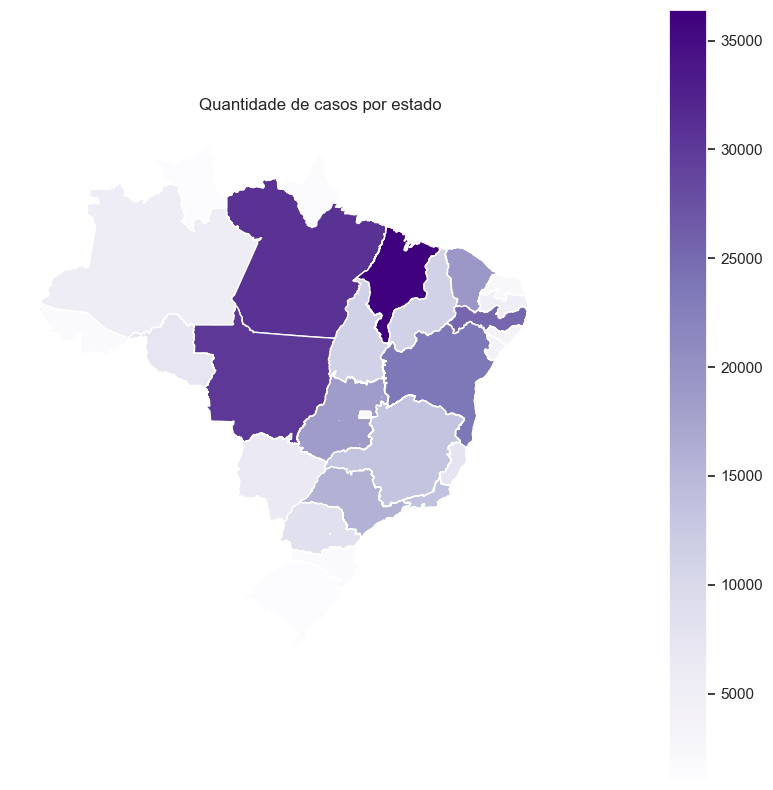

In [24]:
# Carrega o arquivo shapefile do mapa do Brasil
map = gpd.read_file('../assets/mapa/BR_UF_2022.shp')

# Combina o DataFrame com o GeoDataFrame do mapa
map_occurrences = map.merge(df_hans_states, left_on='SIGLA_UF', right_on='UF')

# Plot do mapa do Brasil com os dados
fig, ax = plt.subplots(figsize=(10, 10))
map_occurrences.plot(column='Contagem', cmap='Purples', ax=ax, legend=True)
ax.set_title('Quantidade de casos por estado')
ax.set_axis_off()
plt.show()

### Análise de casos por estado e por ano

In [46]:
df_hans_states_per_year = df_hans[['UFATUAL', 'NU_ANO']].value_counts().to_frame().reset_index()
df_hans_states_per_year = df_hans_states_per_year.rename(columns={'UFATUAL': 'UF', 0: 'Contagem'})
df_hans_states_per_year.head()

,UF,NU_ANO,Contagem
0,MT,2018,4058
1,MT,2019,3881
2,MA,2009,3816
3,MA,2010,3779
4,PA,2009,3697


In [58]:
years_analysis = df_hans_states_per_year['NU_ANO'].unique()
years_analysis.sort()

In [74]:
for i in range(len(years_analysis)):
    year = years_analysis[i]
    # Combina o DataFrame com o GeoDataFrame do mapa
    map_occurrences = map.merge(df_hans_states_per_year[df_hans_states_per_year['NU_ANO']==year], left_on='SIGLA_UF', right_on='UF')
    map_occurrences.drop(['NU_ANO'], axis=1, inplace=True)
    map_occurrences.fillna(0, inplace=True)

    # Plot do mapa do Brasil com os dados
    fig, ax = plt.subplots(figsize=(10, 10))
    map_occurrences.plot(column='Contagem', cmap='Purples', ax=ax, legend=True)
    ax.set_title('Quantidade de casos por estado em {}'.format(year))
    ax.set_axis_off()
    
    # Salva a imagem com o nome do ano
    plt.savefig('../assets/graficos/mapa_{}.png'.format(year))
    plt.close()
    
# usar a biblioteca imageio para criar o gif a partir das imagens salvas
imagens = []
for i in range(len(years_analysis)):
    year = years_analysis[i]
    nome_arquivo = f'../assets/graficos/mapa_{year}.png'
    imagem = imageio.imread(nome_arquivo)
    imagens.append(imagem)

# criar o gif a partir das imagens
imageio.mimsave('../assets/graficos/graficos.gif', imagens, fps=2)

C:\Users\mclar\AppData\Local\Temp\ipykernel_10864\2606760924.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagem = imageio.imread(nome_arquivo)


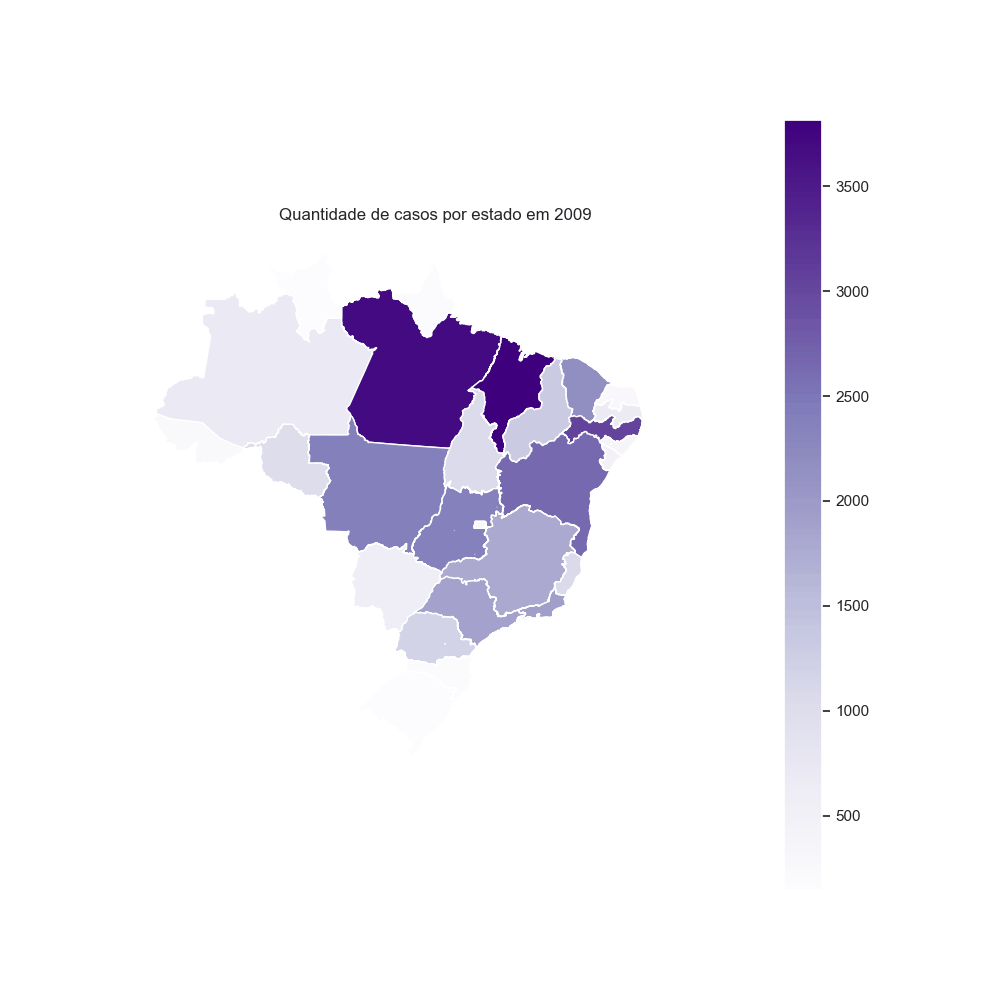

In [80]:
# Exibe o GIF dos casos em cada estado por ano
Image(filename='../assets/graficos/graficos.gif')


### Análise de casos por estado e gravidade

In [25]:
df_hans_severity = df_hans.groupby(['UFATUAL', 'AVALIA_N']).size().reset_index(name='Contagem')
df_hans_severity.head()

,UFATUAL,AVALIA_N,Contagem
0,AC,0.0,1347
1,AC,1.0,290
2,AC,2.0,93
3,AC,3.0,21
4,AL,0.0,1967


#### Grau 0:

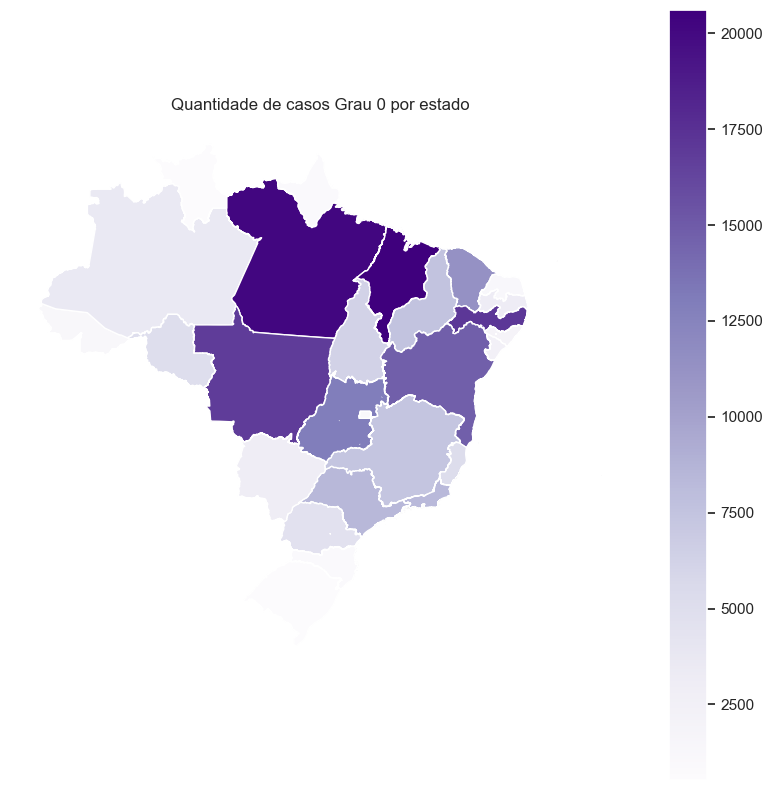

In [26]:
df_hans_severity_0 = df_hans_severity.loc[df_hans_severity['AVALIA_N'] == 0].drop('AVALIA_N', axis=1)

# Combina o DataFrame com o GeoDataFrame do mapa
map_occurrences_0 = map.merge(df_hans_severity_0, left_on='SIGLA_UF', right_on='UFATUAL')

# Plot do mapa do Brasil com os dados
fig, ax = plt.subplots(figsize=(10, 10))
map_occurrences_0.plot(column='Contagem', cmap='Purples', ax=ax, legend=True)
ax.set_title('Quantidade de casos Grau 0 por estado')
ax.set_axis_off()
plt.show()

#### Grau I:

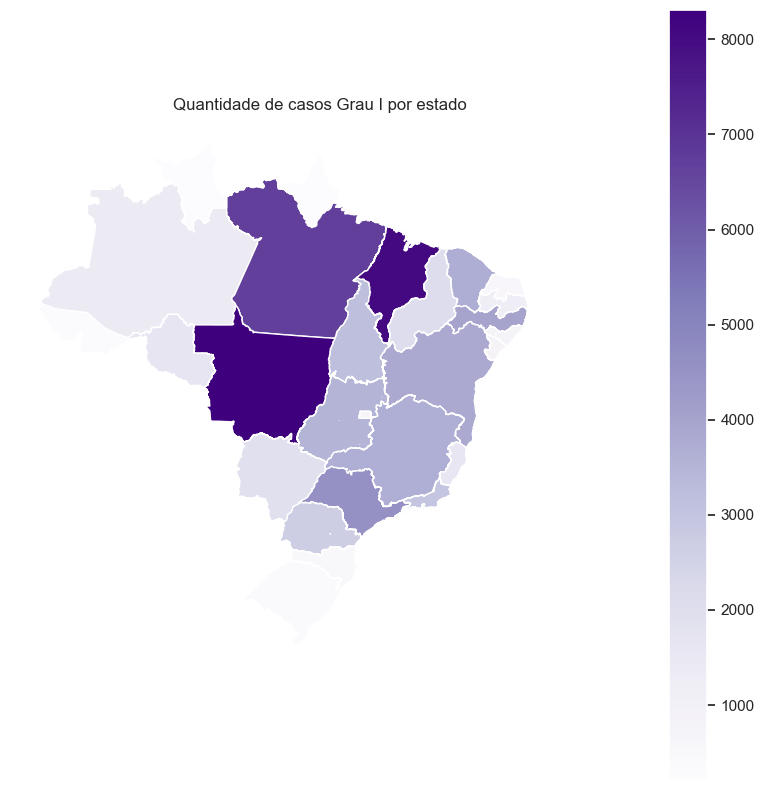

In [27]:
df_hans_severity_1 = df_hans_severity.loc[df_hans_severity['AVALIA_N'] == 1].drop('AVALIA_N', axis=1)

# Combina o DataFrame com o GeoDataFrame do mapa
map_occurrences_1 = map.merge(df_hans_severity_1, left_on='SIGLA_UF', right_on='UFATUAL')

# Plot do mapa do Brasil com os dados
fig, ax = plt.subplots(figsize=(10, 10))
map_occurrences_1.plot(column='Contagem', cmap='Purples', ax=ax, legend=True)
ax.set_title('Quantidade de casos Grau I por estado')
ax.set_axis_off()
plt.show()

#### Grau II:

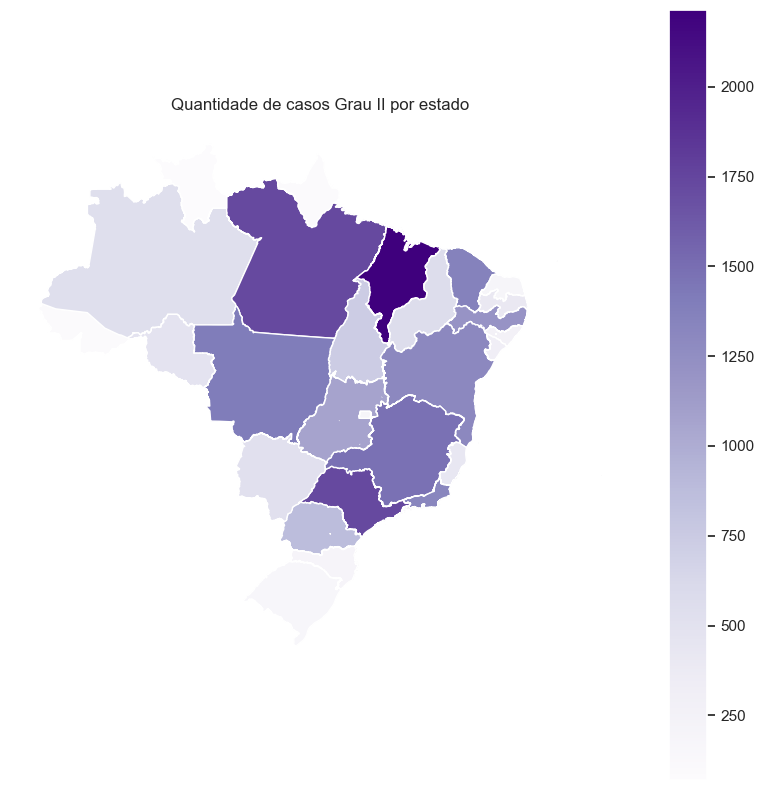

In [28]:
df_hans_severity_2 = df_hans_severity.loc[df_hans_severity['AVALIA_N'] == 2].drop('AVALIA_N', axis=1)

# Combina o DataFrame com o GeoDataFrame do mapa
map_occurrences_2 = map.merge(df_hans_severity_2, left_on='SIGLA_UF', right_on='UFATUAL')

# Plot do mapa do Brasil com os dados
fig, ax = plt.subplots(figsize=(10, 10))
map_occurrences_2.plot(column='Contagem', cmap='Purples', ax=ax, legend=True)
ax.set_title('Quantidade de casos Grau II por estado')
ax.set_axis_off()
plt.show()

### Análise do abandono

In [29]:
# Considerar apenas casos com desfecho: cura, óbito ou abandono
df_hans_tp_alta = df_hans[df_hans['TPALTA_N'].isin([1, 6, 7])]

<AxesSubplot: >

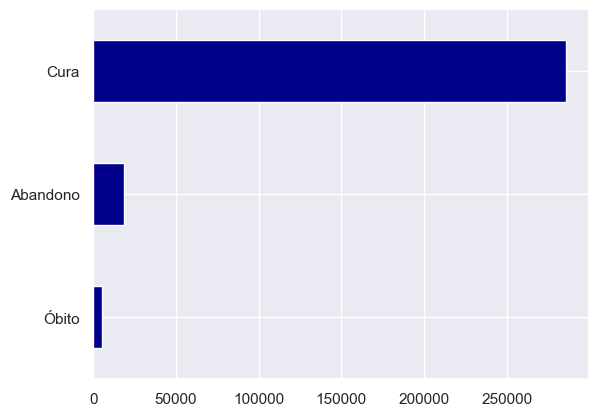

In [30]:
df_hans_outcome = df_hans_tp_alta.copy()
df_hans_outcome['TPALTA_N'] = df_hans_outcome['TPALTA_N'].replace({1: 'Cura', 6: 'Óbito', 7: 'Abandono'})
df_hans_outcome['TPALTA_N'].value_counts().sort_values().plot.barh(color='darkblue')